In [192]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df =  pd.read_csv("fcc-forum-pageviews.csv", index_col="date" , parse_dates=["date"])



In [184]:
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [193]:
# Clean the data
mask = (
    
    (df['value'] >=  df['value'].quantile(0.025))&
    (df['value'] <=  df['value'].quantile(0.975))
       
       )
df = df[mask]



1238

In [197]:
int(df.count())
#df.columns = [ 'Date','Page Viwes']
#df


1238

Text(0, 0.5, 'Page Views')

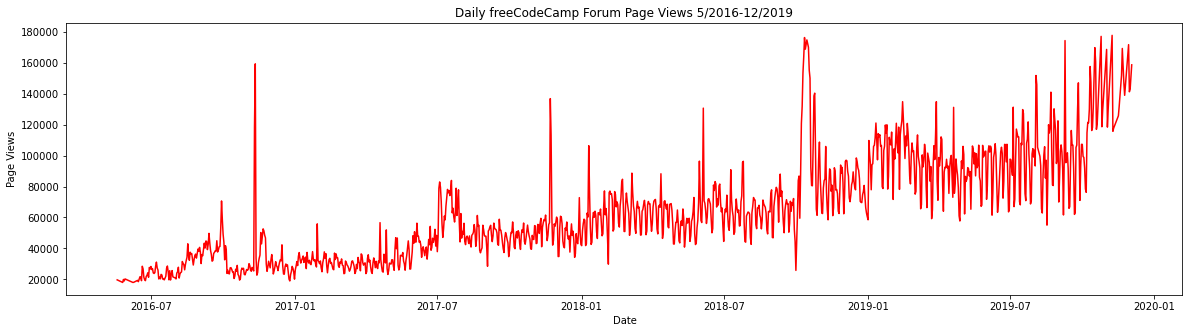

In [144]:
plt.figure(figsize=(20,5))
plt.plot(df.index,df.value,  color = 'red' )
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel("Date")
plt.ylabel("Page Views")
#plt.xticks(1,3,5)

In [133]:
ff

,date,value,Month,Year
42,2016-06-20,28508,June,2016
51,2016-06-29,27734,June,2016
53,2016-07-01,28372,July,2016
59,2016-07-07,28507,July,2016
60,2016-07-08,31184,July,2016
...,...,...,...,...
376,2017-05-20,30077,May,2017
378,2017-05-22,32100,May,2017
385,2017-05-29,32635,May,2017
482,2017-09-03,28497,September,2017


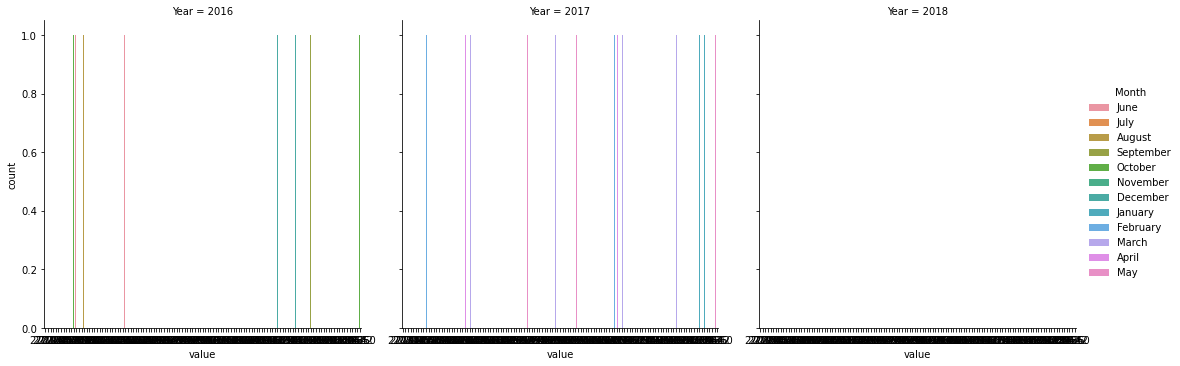

In [132]:
ff = df
ff["Month"] = pd.to_datetime(ff.date).dt.month
ff["Year"] = pd.to_datetime(ff.date).dt.year
look_up = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
ff['Month'] = df['Month'].apply(lambda x: look_up[x])
ff
fig = sns.catplot( data=ff , x='value', hue = 'Month',
            kind='count' , col='Year'
                
                 )



<ipython-input-161-f1f228124d2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["month"] = df.index.month
<ipython-input-161-f1f228124d2e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year"] = df.index.year


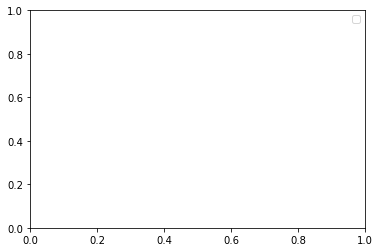

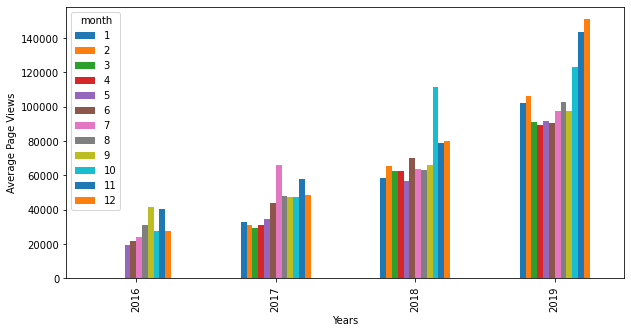

In [161]:

df["month"] = df.index.month
df["year"] = df.index.year
ff = df.groupby(["year" , "month"])["value"].mean()
ff = ff.unstack()

thePlot = ff.plot.bar(legend=True, xlabel = "Years",ylabel="Average Page Views", figsize=(10,5)).figure
plt.legend ([
'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
])

#print(ff)
#print(ff.unstack)

Text(0, 0.5, 'Page Views')

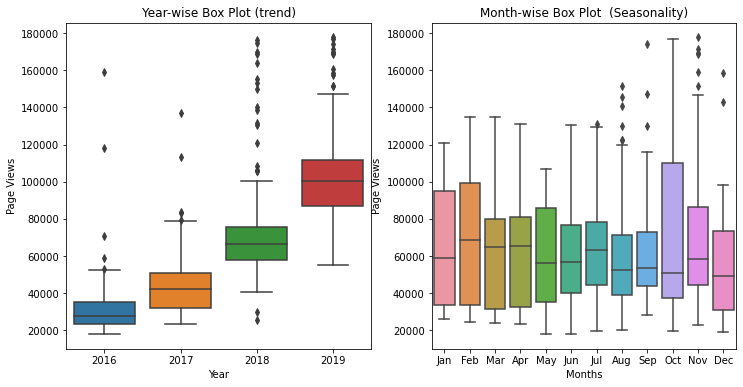

In [179]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box["month_num"] = df_box["date"].dt.month
df_box = df_box.sort_values("month_num")
fig, axes = plt.subplots(nrows=1, ncols=2 , figsize=(12,6) )
axes[0] = sns.boxplot(x=df_box["year"] , y=df_box["value"], ax=axes[0] )
axes[0].set_title("Year-wise Box Plot (trend)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Page Views")
axes[1] = sns.boxplot(x=df_box["month"] , y=df_box["value"], ax=axes[1])
axes[1].set_title("Month-wise Box Plot  (Seasonality)")
axes[1].set_xlabel("Months")
axes[1].set_ylabel("Page Views")



